<a href="https://colab.research.google.com/github/Sristi222/NepaliFakeCurrencyDetection/blob/main/Coursewok_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset'

In [ ]:
# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_EPOCHS = 25  # Increased number of epochs
LEARNING_RATE = 0.0001  # Lower learning rate for fine-tuning

In [ ]:
# Data preprocessing with augmentation
datagen_train = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_validation = ImageDataGenerator(rescale=1.0 / 255.0)

In [ ]:
# Load train, validation, and test datasets
train_data = datagen_train.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

Found 186 images belonging to 2 classes.


In [ ]:
validation_data = datagen_validation.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Validation",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 75 images belonging to 2 classes.


In [ ]:
test_data = datagen_validation.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 130 images belonging to 2 classes.


In [ ]:
# Load pre-trained MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Load pre-trained MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

In [ ]:
# Extract features for the training set
train_features = feature_extractor.predict(train_data, verbose=1)
train_features = train_features.reshape(train_features.shape[0], -1)  # Flatten features
train_labels = train_data.classes

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step


In [71]:
# Extract features for the validation set
validation_features = feature_extractor.predict(validation_data, verbose=1)
validation_features = validation_features.reshape(validation_features.shape[0], -1)  # Flatten features
validation_labels = validation_data.classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


In [ ]:
# Extract features for the test set
test_features = feature_extractor.predict(test_data, verbose=1)
test_features = test_features.reshape(test_features.shape[0], -1)
test_labels = test_data.classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step


In [ ]:
# Build CNN Model
cnn_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]

In [ ]:
# Train the Model
history = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=NUM_EPOCHS,
    callbacks=callbacks
)


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.4211 - loss: 1.0206 - val_accuracy: 0.6000 - val_loss: 0.6701 - learning_rate: 1.0000e-04
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4940 - loss: 0.8421 - val_accuracy: 0.7333 - val_loss: 0.5854 - learning_rate: 1.0000e-04
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5568 - loss: 0.6971 - val_accuracy: 0.7733 - val_loss: 0.5186 - learning_rate: 1.0000e-04
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7287 - loss: 0.5473 - val_accuracy: 0.8267 - val_loss: 0.4742 - learning_rate: 1.0000e-04
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6749 - loss: 0.5827 - val_accuracy: 0.7867 - val_loss: 0.4432 - learning_rate: 1.0000e-04
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8232 - loss: 0.4721 - val_accuracy: 0.8800 - val_loss: 0.3966 - learning_rate: 1.0000e-04
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8073 - loss: 0.4418 - val_

In [ ]:
# Unfreeze Some Layers for Fine-Tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Freeze all but the last 50 layers
    layer.trainable = False


In [ ]:
# Recompile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # Use a lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Recompile the Model
cnn_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # Use a lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fine-Tune the Model
fine_tune_epochs = 10
history_fine_tune = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=fine_tune_epochs,
    callbacks=callbacks
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8745 - loss: 0.3409 - val_accuracy: 0.9733 - val_loss: 0.1419 - learning_rate: 1.0000e-05
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9132 - loss: 0.3088 - val_accuracy: 0.9733 - val_loss: 0.1307 - learning_rate: 1.0000e-05
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9022 - loss: 0.2825 - val_accuracy: 0.9867 - val_loss: 0.1207 - learning_rate: 1.0000e-05
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9113 - loss: 0.2824 - val_accuracy: 0.9867 - val_loss: 0.1111 - learning_rate: 1.0000e-05
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.9074 - loss: 0.2559 - val_accuracy: 0.9867 - val_loss: 0.1022 - learning_rate: 1.0000e-05
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8991 - loss: 0.2768 - val_accuracy: 0.9867 - val_loss: 0.0937 - learning_rate: 1.0000e-05
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9102 - loss: 0.2441 - val_

In [ ]:
# Evaluate on the Test Set
test_loss, test_accuracy = cnn_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9961 - loss: 0.0701
Test Loss: 0.0903
Test Accuracy: 99.23%


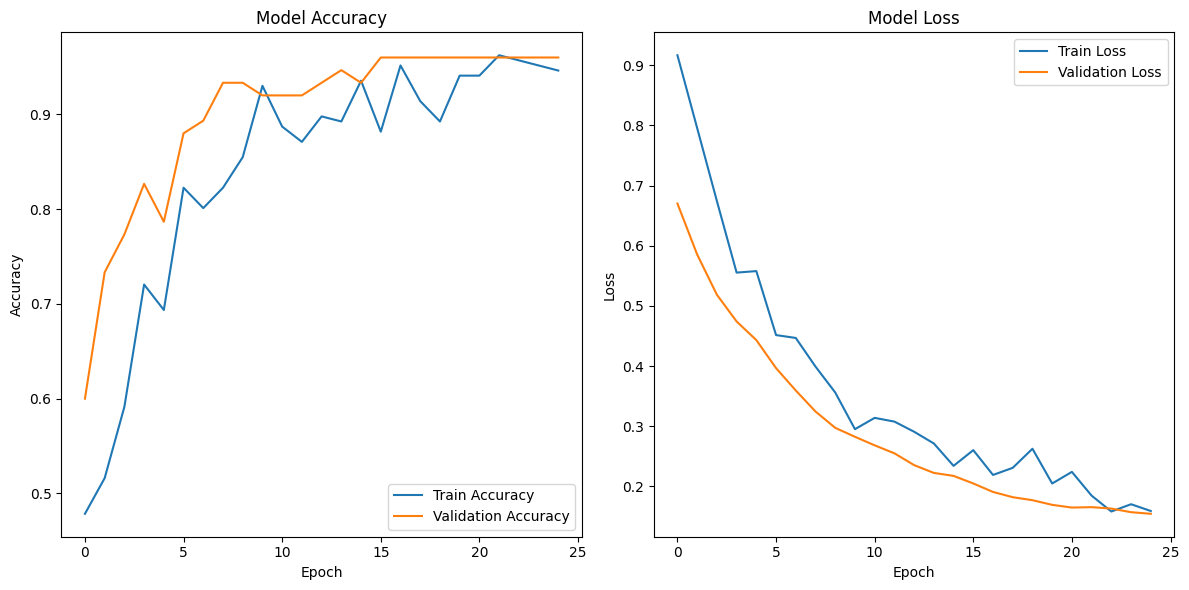

In [ ]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      1.00      0.99        76
        Real       1.00      0.98      0.99        54

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



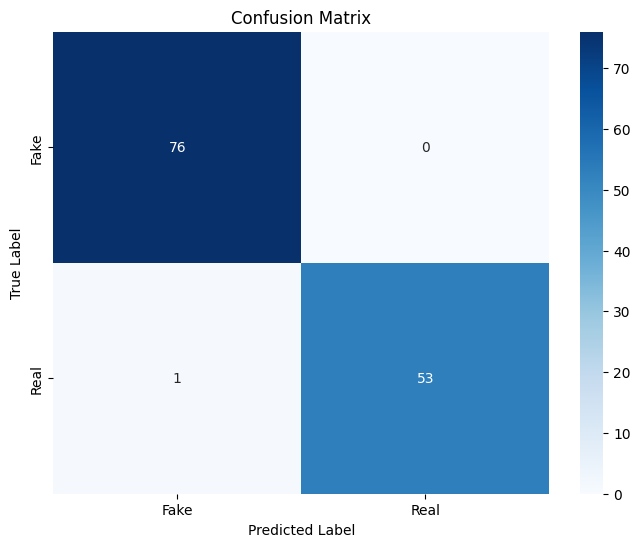

In [ ]:
#Generate predictions and plot confusion matrix
y_true = test_data.classes
y_pred = cnn_model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Fake', 'Real']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step


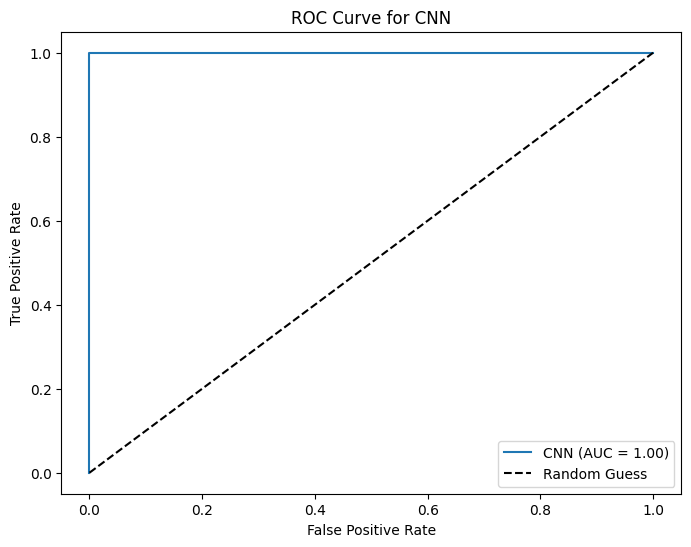

In [79]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set using CNN
y_pred_prob_cnn = cnn_model.predict(test_data).flatten()  # Predicted probabilities
y_true = test_data.classes  # True labels

# Calculate ROC and AUC
fpr_cnn, tpr_cnn, _ = roc_curve(y_true, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plot ROC curve for CNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [82]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the function for prediction
def predict_image(image_path, model, target_size=(224, 224)):

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction_prob = model.predict(img_array)[0][0]  # Get the probability of being "Real"
    prediction = "Real" if prediction_prob > 0.5 else "Fake"

    print(f"Prediction: {prediction} (Probability of being 'Real': {prediction_prob:.2f})")
    return prediction

# Example Usage
image_path = "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test/Real/Compressed_IMG_20180717_114648_1_jpg.rf.0b8777ce36f0501b47367d93efa16c41.jpg"  # Replace with your image path
predict_image(image_path, cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Real (Probability of being 'Real': 0.73)


'Real'

In [ ]:
# Train SVM model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(train_features, train_labels)

SVC(kernel='linear', probability=True)

In [ ]:
# Evaluate SVM
svm_predictions = svm_model.predict(test_features)
svm_accuracy = np.mean(svm_predictions == test_labels)
print(f"SVM Test Accuracy: {svm_accuracy * 100:.2f}%")

SVM Test Accuracy: 60.77%


In [ ]:
# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust 'n_neighbors' as needed
knn_model.fit(train_features, train_labels)  # train_features and train_labels should be defined earlier

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Evaluate KNN
knn_predictions = knn_model.predict(test_features)
knn_accuracy = np.mean(knn_predictions == test_labels)
print(f"KNN Test Accuracy: {knn_accuracy * 100:.2f}%")

KNN Test Accuracy: 50.00%


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


In [ ]:
Build SVM Model
# **Feature Scaling**
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.transform(validation_features)
test_features_scaled = scaler.transform(test_features)

In [ ]:
# **Dimensionality Reduction with PCA
pca = PCA(n_components=50)  # Reduce features to 50 dimensions
train_features_pca = pca.fit_transform(train_features_scaled)
validation_features_pca = pca.transform(validation_features_scaled)
test_features_pca = pca.transform(test_features_scaled)


In [ ]:
# **Balance Dataset with SMOTE
smote = SMOTE()
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features_pca, train_labels)

In [ ]:
# **SVM Model Hyperparameter Tuning**
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, cv=2, scoring='accuracy', verbose=2)
svm_grid.fit(train_features_resampled, train_labels_resampled)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=2, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
# **Best SVM Model**
svm_model = svm_grid.best_estimator_

In [ ]:
# **Evaluate SVM**
svm_test_predictions = svm_model.predict(test_features_pca)
svm_test_accuracy = accuracy_score(test_labels, svm_test_predictions)

In [ ]:
print(f"\nBest SVM Parameters: {svm_grid.best_params_}")
print(f"SVM Test Accuracy: {svm_test_accuracy * 100:.2f}%")


Best SVM Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVM Test Accuracy: 69.23%


Classification Report (SVM):
              precision    recall  f1-score   support

        Fake       0.72      0.78      0.75        76
        Real       0.65      0.57      0.61        54

    accuracy                           0.69       130
   macro avg       0.68      0.68      0.68       130
weighted avg       0.69      0.69      0.69       130



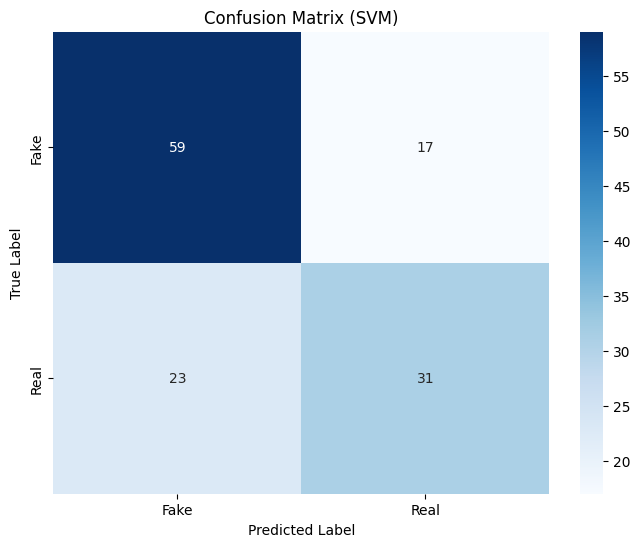

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions using SVM
y_true = test_labels  # True labels for the test data
y_pred = svm_model.predict(test_features_pca)  # Predictions from the SVM model

# Classification report
print("Classification Report (SVM):")
print(classification_report(y_true, y_pred, target_names=['Fake', 'Real']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()


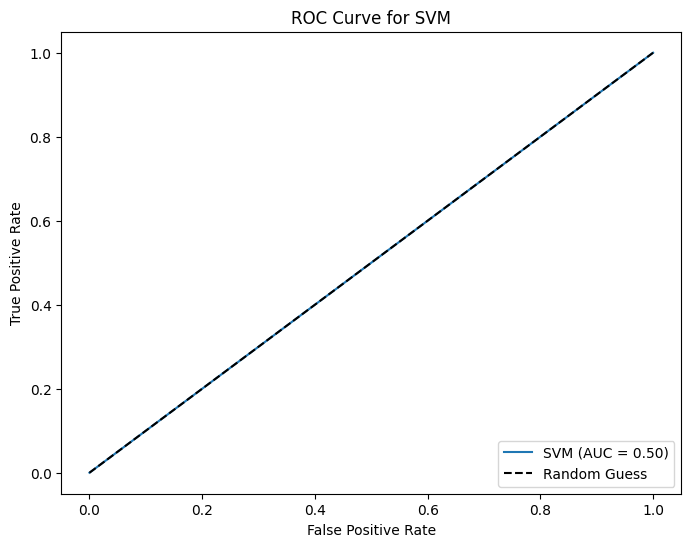

In [80]:
# Predict probabilities for the test set using SVM
y_pred_prob_svm = svm_model.predict_proba(test_features_pca)[:, 1]  # Get probabilities for the positive class

# Calculate ROC and AUC
fpr_svm, tpr_svm, _ = roc_curve(test_labels, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
# Load feature extractor (MobileNetV2)
feature_extractor = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def preprocess_image_consistently(image_path, feature_extractor, scaler, pca):
    # Load and preprocess the image (resize and normalize)
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Extract features using the feature extractor
    extracted_features = feature_extractor.predict(img_array)
    extracted_features = extracted_features.reshape(1, -1)  # Flatten
    # Scale and apply PCA
    scaled_features = scaler.transform(extracted_features)
    pca_features = pca.transform(scaled_features)
    return pca_features

def predict_image_with_svm(image_path, svm_model, feature_extractor, scaler, pca):
    # Preprocess the image
    image_features = preprocess_image_consistently(image_path, feature_extractor, scaler, pca)
    # Predict using SVM
    prediction = svm_model.predict(image_features)
    return "Real" if prediction[0] == 1 else "Fake"
image_path = "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test/Real/Compressed_IMG_20180717_114648_1_jpg.rf.0b8777ce36f0501b47367d93efa16c41.jpg"  # Replace with your image path
svm_prediction = predict_image_with_svm(image_path, svm_model, feature_extractor, scaler, pca)
print(f"Prediction using SVM: {svm_prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction using SVM: Real


In [ ]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Evaluate KNN
knn_predictions = knn_model.predict(test_features)
knn_accuracy = np.mean(knn_predictions == test_labels)
print(f"KNN Test Accuracy: {knn_accuracy * 100:.2f}%")

KNN Test Accuracy: 50.00%


Classification Report (KNN):
              precision    recall  f1-score   support

        Fake       0.76      0.21      0.33        76
        Real       0.45      0.91      0.60        54

    accuracy                           0.50       130
   macro avg       0.61      0.56      0.47       130
weighted avg       0.63      0.50      0.44       130



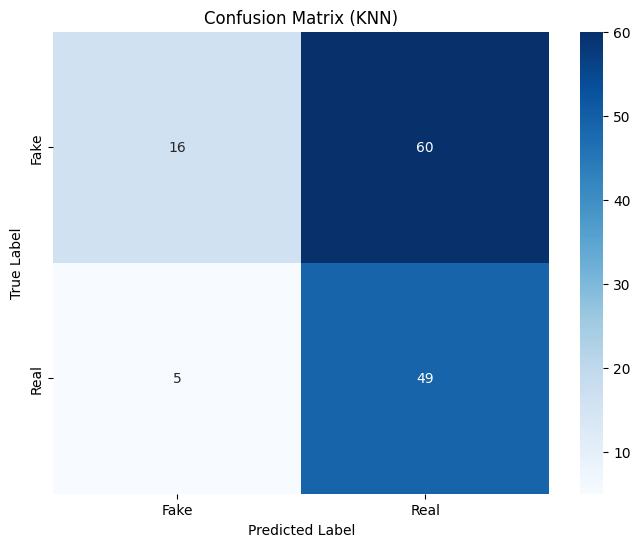

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions using KNN
y_true = test_labels  # True labels for the test data
y_pred = knn_model.predict(test_features)  # Predictions from the KNN model

# Classification report
print("Classification Report (KNN):")
print(classification_report(y_true, y_pred, target_names=['Fake', 'Real']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')
plt.show()


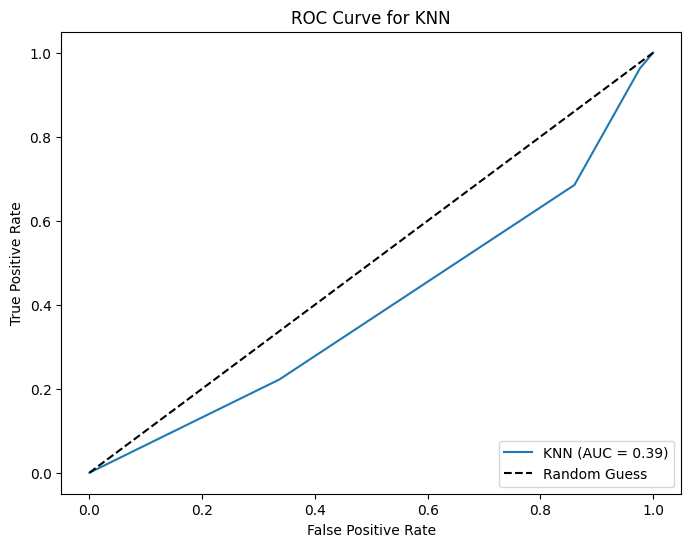

In [81]:
# Predict probabilities for the test set using KNN
y_pred_prob_knn = knn_model.predict_proba(test_features)[:, 1]  # Get probabilities for the positive class

# Calculate ROC and AUC
fpr_knn, tpr_knn, _ = roc_curve(test_labels, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image_knn_fixed(image_path, knn_model, feature_extractor, scaler):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Extract features using the feature extractor
    img_features = feature_extractor.predict(img_array).reshape(1, -1)

    # Scale the extracted features
    img_features_scaled = scaler.transform(img_features)

    # Predict using KNN
    knn_prediction = knn_model.predict(img_features_scaled)[0]
    result = "Real" if knn_prediction == 1 else "Fake"

    return result

# Example usage
image_path = "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test/Real/Compressed_IMG_20180717_114648_1_jpg.rf.0b8777ce36f0501b47367d93efa16c41.jpg"  # Replace with the path to your input image
prediction = predict_image_knn_fixed(image_path, knn_model, feature_extractor, scaler)
print(f"Prediction using KNN: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Prediction using KNN: Real


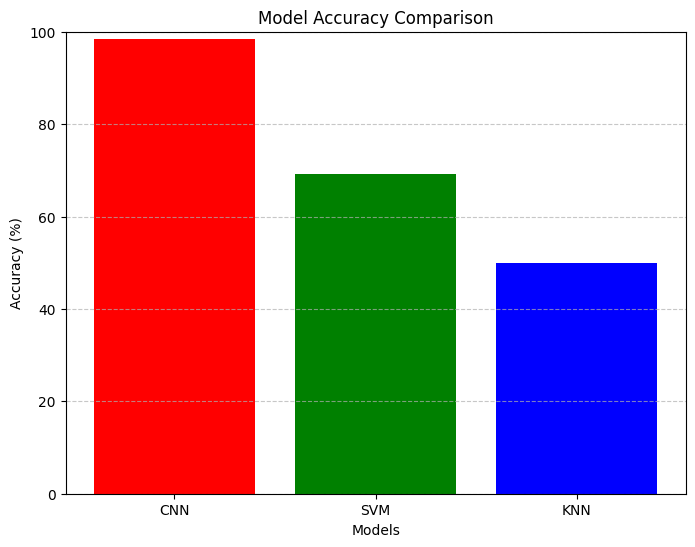

In [86]:
import matplotlib.pyplot as plt

# Define accuracies
model_accuracies = {
    "CNN": 98.46,  # actual CNN accuracy
    "SVM": 69.23,  # actual SVM accuracy
    "KNN": 50.00   # actual KNN accuracy
}

# Extract model names and their respective accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['red', 'green', 'blue'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis range from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      1.00      0.99        76
        Real       1.00      0.96      0.98        54

    accuracy                           0.98       130
   macro avg       0.99      0.98      0.98       130
weighted avg       0.99      0.98      0.98       130



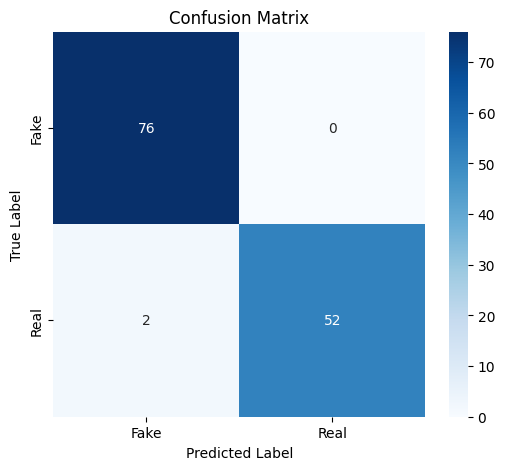

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_true = test_data.classes
y_pred = cnn_model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Fake', 'Real']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [73]:
model_accuracies = {
    'CNN': 98.46,  # actual CNN accuracy
    'SVM': 69.23,  # actual SVM accuracy
    'KNN': 50.00   # actual KNN accuracy
}

In [74]:
# **1. Find the Best Model**
best_model_name = max(model_accuracies, key=model_accuracies.get)
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")
print(f"\nBest Model for Prediction: {best_model_name}")


Model Accuracies:
CNN: 98.46%
SVM: 69.23%
KNN: 50.00%

Best Model for Prediction: CNN


In [75]:
# **2. Function for Prediction**
def predict_image(image_path, cnn_model, svm_model, knn_model, best_model_name):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    if best_model_name == 'CNN':
        # CNN Prediction
        cnn_prob = cnn_model.predict(img_array)[0][0]
        final_prediction = "Real" if cnn_prob > 0.5 else "Fake"
    elif best_model_name == 'SVM':
        # SVM Prediction
        img_features = pca.transform(scaler.transform(feature_extractor.predict(img_array).reshape(1, -1)))
        svm_label = svm_model.predict(img_features)[0]
        final_prediction = "Real" if svm_label == 1 else "Fake"
    elif best_model_name == 'KNN':
        # KNN Prediction
        img_features = pca.transform(scaler.transform(feature_extractor.predict(img_array).reshape(1, -1)))
        knn_label = knn_model.predict(img_features)[0]
        final_prediction = "Real" if knn_label == 1 else "Fake"
    else:
        raise ValueError("Invalid model name")

    print(f"Prediction using {best_model_name}: {final_prediction}")
    return final_prediction

In [76]:

image_path = "/content/drive/MyDrive/Colab Notebooks/NEPALI REAL NOTE.png"
final_prediction = predict_image(image_path, cnn_model, svm_model, knn_model, best_model_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction using CNN: Real


In [77]:

image_path = "/content/drive/MyDrive/Colab Notebooks/Nepali Currency Dataset/Test/Fake/20221216_174403_jpg.rf.020bd01792178f4e0538faa08728da0e.jpg"  # Replace with the path to your image
final_prediction = predict_image(image_path, cnn_model, svm_model, knn_model, best_model_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction using CNN: Fake


<ipython-input-83-5064be9b082e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_labels, palette="pastel")


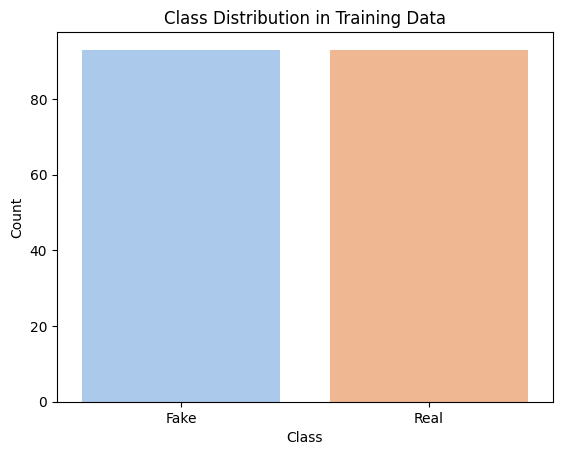

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `train_data` is the directory containing images
labels = train_data.classes
label_names = train_data.class_indices  # Dictionary mapping class names to labels

# Convert label indices to class names
class_names = {v: k for k, v in label_names.items()}
class_labels = [class_names[label] for label in labels]

# Plot class distribution
sns.countplot(x=class_labels, palette="pastel")
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


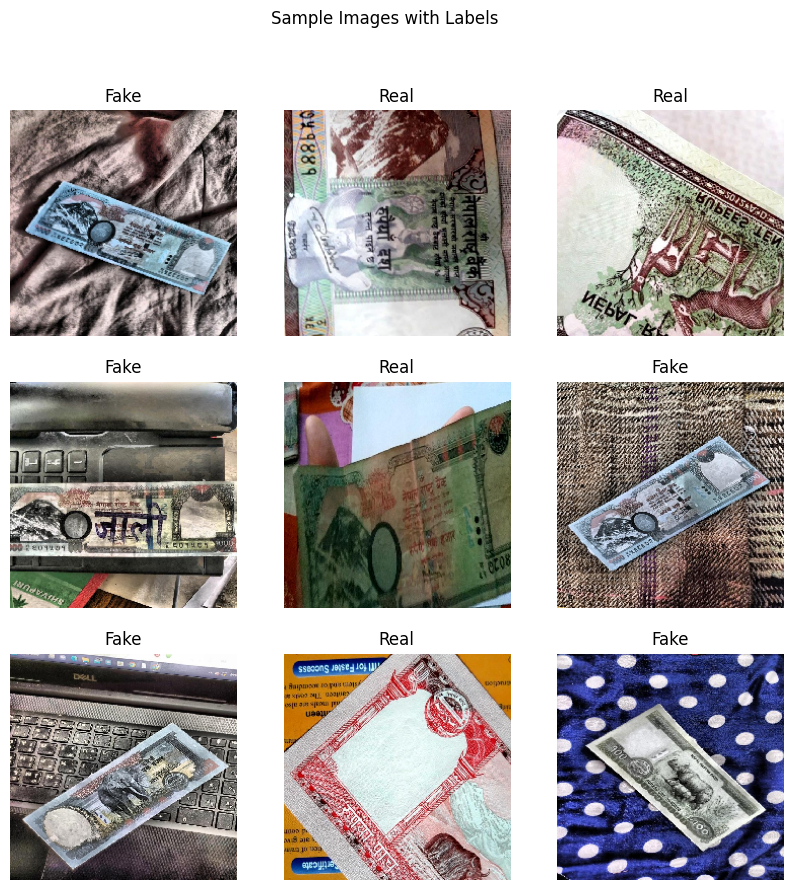

In [84]:
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

# Display a grid of 9 random images
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(train_data.filenames) - 1)
    img_path = train_data.filepaths[idx]
    label = class_labels[idx]

    img = load_img(img_path, target_size=(224, 224))  # Resize images for display
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
plt.suptitle("Sample Images with Labels")
plt.show()
